In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def analyze_data(filename):
    
    df = pd.read_csv(filename)
    dff = df[df['Down'] == 1]
    dff = dff[((dff['Distance'] == 10) & (dff['Yardline'] >= 10)) | ((dff['Yardline'] <= 9) & (dff['Distance'] == dff['Yardline']))]

    dfs = df[df['Down'] == 2]
    dfs = dfs[((dfs['Distance'] == 10) & (dfs['Yardline'] >= 10)) | ((dfs['Yardline'] <= 9) & (dfs['Distance'] == dfs['Yardline']))]

    dft = df[df['Down'] == 3]
    dft = dft[((dft['Distance'] == 10) & (dft['Yardline'] >= 10)) | ((dft['Yardline'] <= 9) & (dft['Distance'] == dft['Yardline']))]

    plt.scatter(dff['Yardline'], dff['EPA'], alpha=0.6)
    plt.scatter(dfs['Yardline'], dfs['EPA'], alpha=0.6, color='r')
    plt.scatter(dft['Yardline'], dft['EPA'], alpha=0.6, color='g')

    plt.xlabel("Yardline")
    plt.ylabel("EPA")
    plt.title("EPA vs. Yardline")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


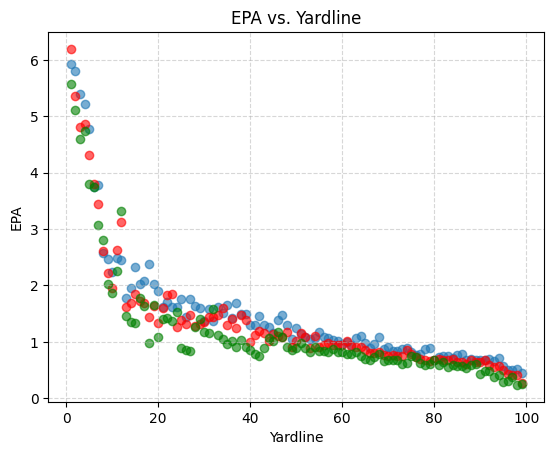

In [3]:
analyze_data('naive_epas/max_epas.csv')

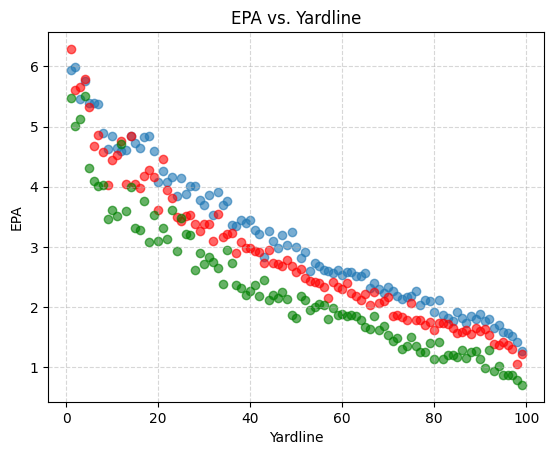

In [4]:
analyze_data('naive_kick_epas/max_epas.csv')

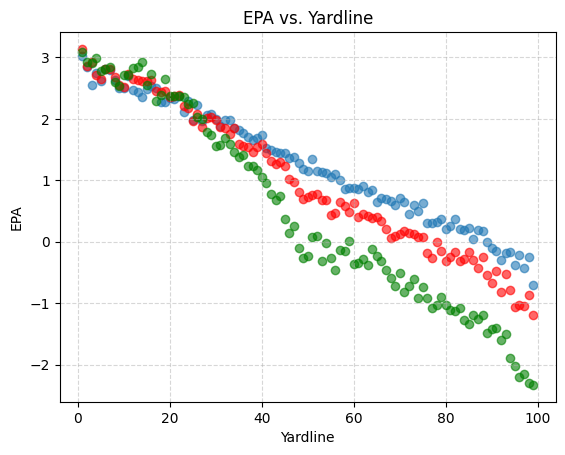

In [5]:
analyze_data('first_round_epas/max_epas.csv')

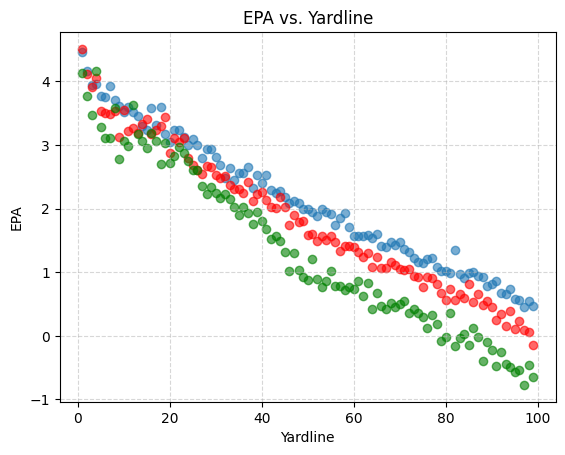

In [6]:
analyze_data('second_round_epas/max_epas.csv')

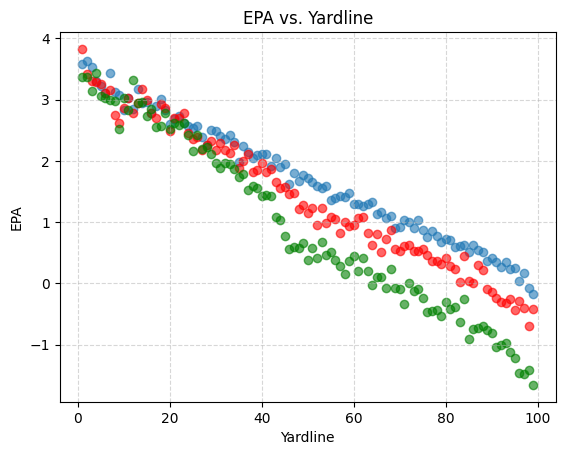

In [7]:
analyze_data('third_round_epas/max_epas.csv')

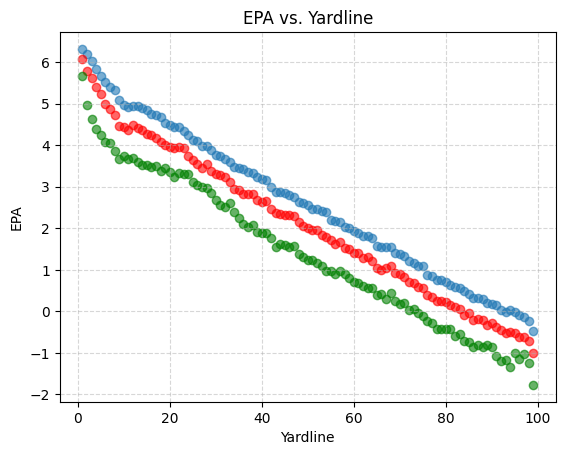

In [8]:
analyze_data('nfl_pbp_data.csv')

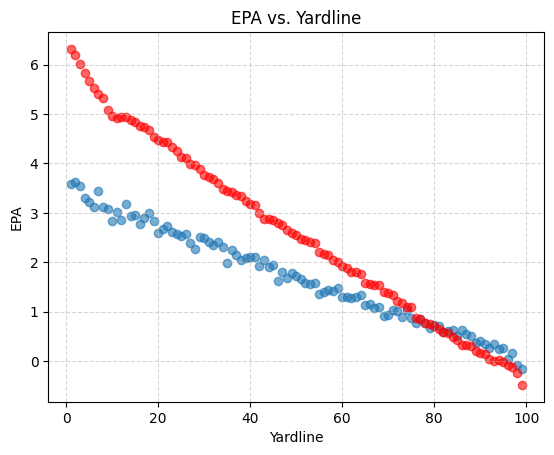

In [9]:
df_sim = pd.read_csv("third_round_epas/max_epas.csv")
df_real = pd.read_csv("nfl_pbp_data.csv")

df_sim = df_sim[df_sim['Down'] == 1]
df_sim = df_sim[((df_sim['Distance'] == 10) & (df_sim['Yardline'] >= 10)) | ((df_sim['Yardline'] <= 9) & (df_sim['Distance'] == df_sim['Yardline']))]

df_real = df_real[df_real['Down'] == 1]
df_real = df_real[((df_real['Distance'] == 10) & (df_real['Yardline'] >= 10)) | ((df_real['Yardline'] <= 9) & (df_real['Distance'] == df_real['Yardline']))]

plt.scatter(df_sim['Yardline'], df_sim['EPA'], alpha=0.6)
plt.scatter(df_real['Yardline'], df_real['EPA'], alpha=0.6, color='r')

plt.xlabel("Yardline")
plt.ylabel("EPA")
plt.title("EPA vs. Yardline")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

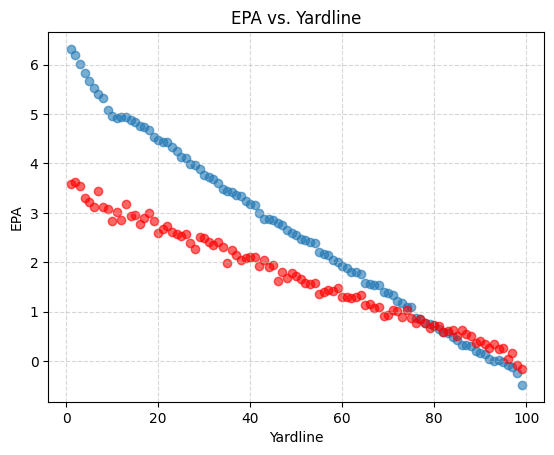

In [10]:
df_sim = pd.read_csv("nfl_pbp_data.csv")
df_real = pd.read_csv("third_round_epas/max_epas.csv")

df_sim = df_sim[df_sim['Down'] == 1]
df_sim = df_sim[((df_sim['Distance'] == 10) & (df_sim['Yardline'] >= 10)) | ((df_sim['Yardline'] <= 9) & (df_sim['Distance'] == df_sim['Yardline']))]

df_real = df_real[df_real['Down'] == 1]
df_real = df_real[((df_real['Distance'] == 10) & (df_real['Yardline'] >= 10)) | ((df_real['Yardline'] <= 9) & (df_real['Distance'] == df_real['Yardline']))]

plt.scatter(df_sim['Yardline'], df_sim['EPA'], alpha=0.6)
plt.scatter(df_real['Yardline'], df_real['EPA'], alpha=0.6, color='r')

plt.xlabel("Yardline")
plt.ylabel("EPA")
plt.title("EPA vs. Yardline")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [11]:
import matplotlib.patches as mpatches  # Import Patch for legend
import matplotlib.cm as cm

### 0th Round

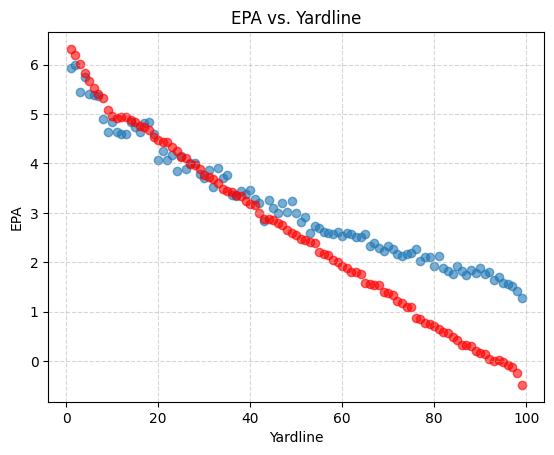

In [12]:
df_sim = pd.read_csv("naive_kick_epas/max_epas.csv")
df_real = pd.read_csv("nfl_pbp_data.csv")

df_sim = df_sim[df_sim['Down'] == 1]
df_sim = df_sim[((df_sim['Distance'] == 10) & (df_sim['Yardline'] >= 10)) | ((df_sim['Yardline'] <= 9) & (df_sim['Distance'] == df_sim['Yardline']))]

df_real = df_real[df_real['Down'] == 1]
df_real = df_real[((df_real['Distance'] == 10) & (df_real['Yardline'] >= 10)) | ((df_real['Yardline'] <= 9) & (df_real['Distance'] == df_real['Yardline']))]

plt.scatter(df_sim['Yardline'], df_sim['EPA'], alpha=0.6)
plt.scatter(df_real['Yardline'], df_real['EPA'], alpha=0.6, color='r')

plt.xlabel("Yardline")
plt.ylabel("EPA")
plt.title("EPA vs. Yardline")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

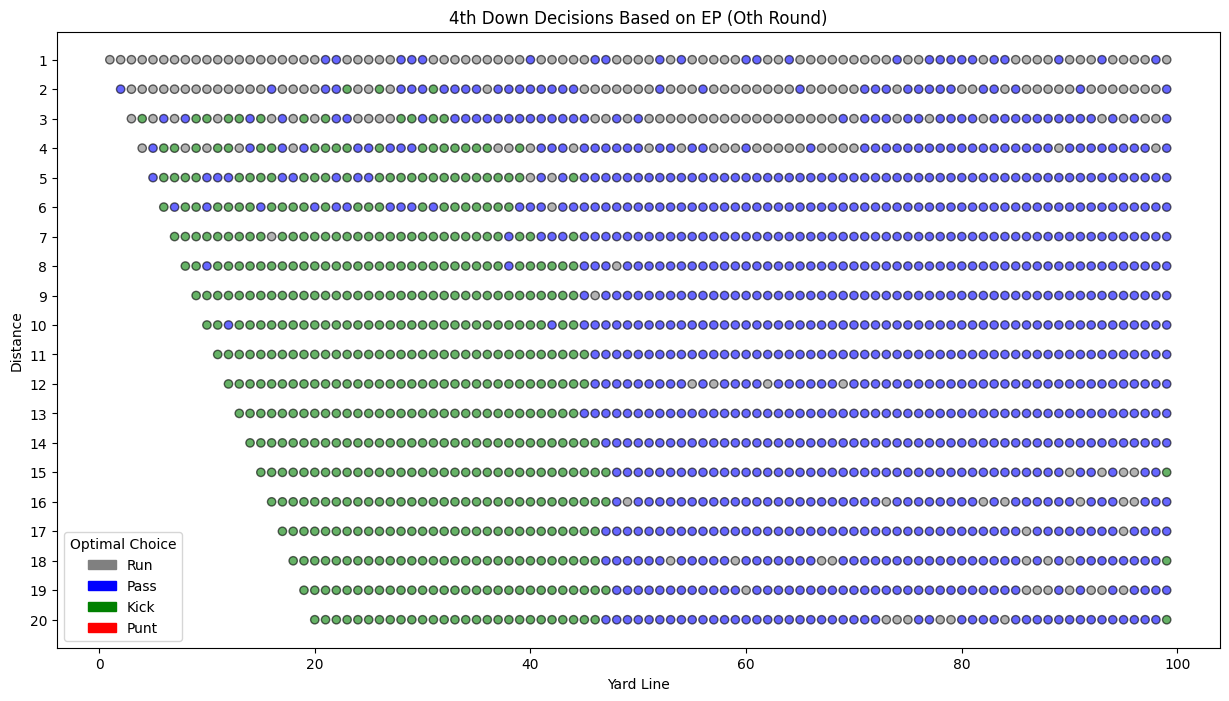

In [13]:
dfo = pd.read_csv("naive_kick_epas/opt_choices.csv")
dfo = dfo[dfo['Down']==4]

colors = {0: 'gray', 1: 'blue', 2: 'green', 3: 'red'}
plt.figure(figsize=(15, 8))
plt.scatter(dfo['Yardline'], dfo['Distance'], c=dfo['Optimal Choice'].map(colors), edgecolors='black', alpha=0.6)
plt.yticks(range(1, 21))
plt.title('4th Down Decisions Based on EP (Oth Round)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')
plt.gca().invert_yaxis()

labels = {0: 'Run', 1: 'Pass', 2: 'Kick', 3: 'Punt'}  # Use dictionary instead of list
legend_patches = [mpatches.Patch(color=color, label=labels[choice]) for choice, color in colors.items()]
plt.legend(handles=legend_patches, title="Optimal Choice")

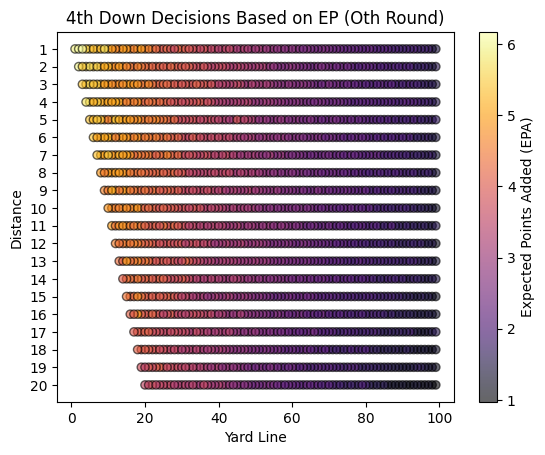

In [14]:
dfo = pd.read_csv("naive_kick_epas/max_epas.csv")
dfo = dfo[(dfo['Down']==1) & (dfo['Distance'] <= 20)]

sc = plt.scatter(
    dfo['Yardline'], dfo['Distance'], c=dfo['EPA'], cmap='inferno', edgecolors='black', alpha=0.6
)

cbar = plt.colorbar(sc)
cbar.set_label("Expected Points Added (EPA)")
plt.yticks(range(1, 21))
plt.gca().invert_yaxis()

# Titles and labels
plt.title('4th Down Decisions Based on EP (Oth Round)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')

plt.show()

### 1st Round

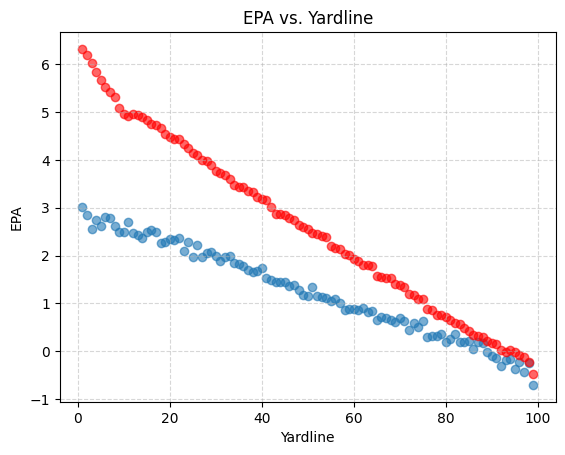

In [15]:
df_sim = pd.read_csv("first_round_epas/max_epas.csv")
df_real = pd.read_csv("nfl_pbp_data.csv")

df_sim = df_sim[df_sim['Down'] == 1]
df_sim = df_sim[((df_sim['Distance'] == 10) & (df_sim['Yardline'] >= 10)) | ((df_sim['Yardline'] <= 9) & (df_sim['Distance'] == df_sim['Yardline']))]

df_real = df_real[df_real['Down'] == 1]
df_real = df_real[((df_real['Distance'] == 10) & (df_real['Yardline'] >= 10)) | ((df_real['Yardline'] <= 9) & (df_real['Distance'] == df_real['Yardline']))]

plt.scatter(df_sim['Yardline'], df_sim['EPA'], alpha=0.6)
plt.scatter(df_real['Yardline'], df_real['EPA'], alpha=0.6, color='r')

plt.xlabel("Yardline")
plt.ylabel("EPA")
plt.title("EPA vs. Yardline")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

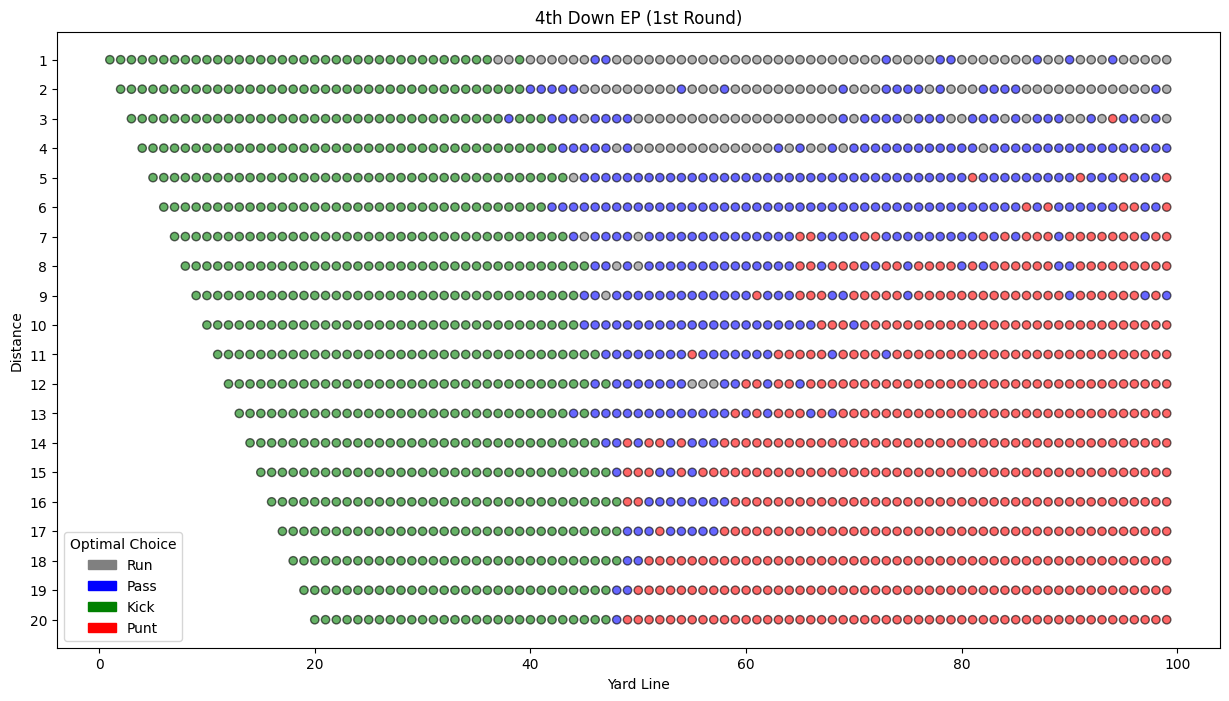

In [16]:
dfo = pd.read_csv("first_round_epas/opt_choices.csv")
dfo = dfo[dfo['Down']==4]

colors = {0: 'gray', 1: 'blue', 2: 'green', 3: 'red'}
plt.figure(figsize=(15, 8))
plt.scatter(dfo['Yardline'], dfo['Distance'], c=dfo['Optimal Choice'].map(colors), edgecolors='black', alpha=0.6)
plt.yticks(range(1, 21))
plt.title('4th Down EP (1st Round)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')
plt.gca().invert_yaxis()

labels = {0: 'Run', 1: 'Pass', 2: 'Kick', 3: 'Punt'}  # Use dictionary instead of list
legend_patches = [mpatches.Patch(color=color, label=labels[choice]) for choice, color in colors.items()]
plt.legend(handles=legend_patches, title="Optimal Choice")

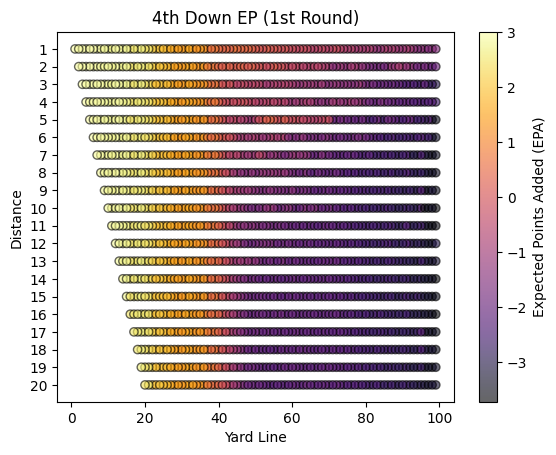

In [17]:
dfo = pd.read_csv("first_round_epas/max_epas.csv")
dfo = dfo[(dfo['Down']==4) & ~(dfo['Distance'] > dfo['Yardline']) & (dfo['Distance'] <= 20)]

sc = plt.scatter(
    dfo['Yardline'], dfo['Distance'], c=dfo['EPA'], cmap='inferno', edgecolors='black', alpha=0.6
)

cbar = plt.colorbar(sc)
cbar.set_label("Expected Points Added (EPA)")
plt.yticks(range(1, 21))
plt.gca().invert_yaxis()

# Titles and labels
plt.title('4th Down EP (1st Round)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')

plt.show()

### 2nd Round

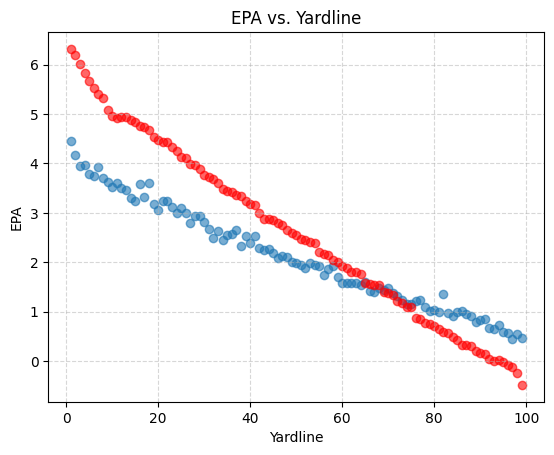

In [18]:
df_sim = pd.read_csv("second_round_epas/max_epas.csv")
df_real = pd.read_csv("nfl_pbp_data.csv")

df_sim = df_sim[df_sim['Down'] == 1]
df_sim = df_sim[((df_sim['Distance'] == 10) & (df_sim['Yardline'] >= 10)) | ((df_sim['Yardline'] <= 9) & (df_sim['Distance'] == df_sim['Yardline']))]

df_real = df_real[df_real['Down'] == 1]
df_real = df_real[((df_real['Distance'] == 10) & (df_real['Yardline'] >= 10)) | ((df_real['Yardline'] <= 9) & (df_real['Distance'] == df_real['Yardline']))]

plt.scatter(df_sim['Yardline'], df_sim['EPA'], alpha=0.6)
plt.scatter(df_real['Yardline'], df_real['EPA'], alpha=0.6, color='r')

plt.xlabel("Yardline")
plt.ylabel("EPA")
plt.title("EPA vs. Yardline")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

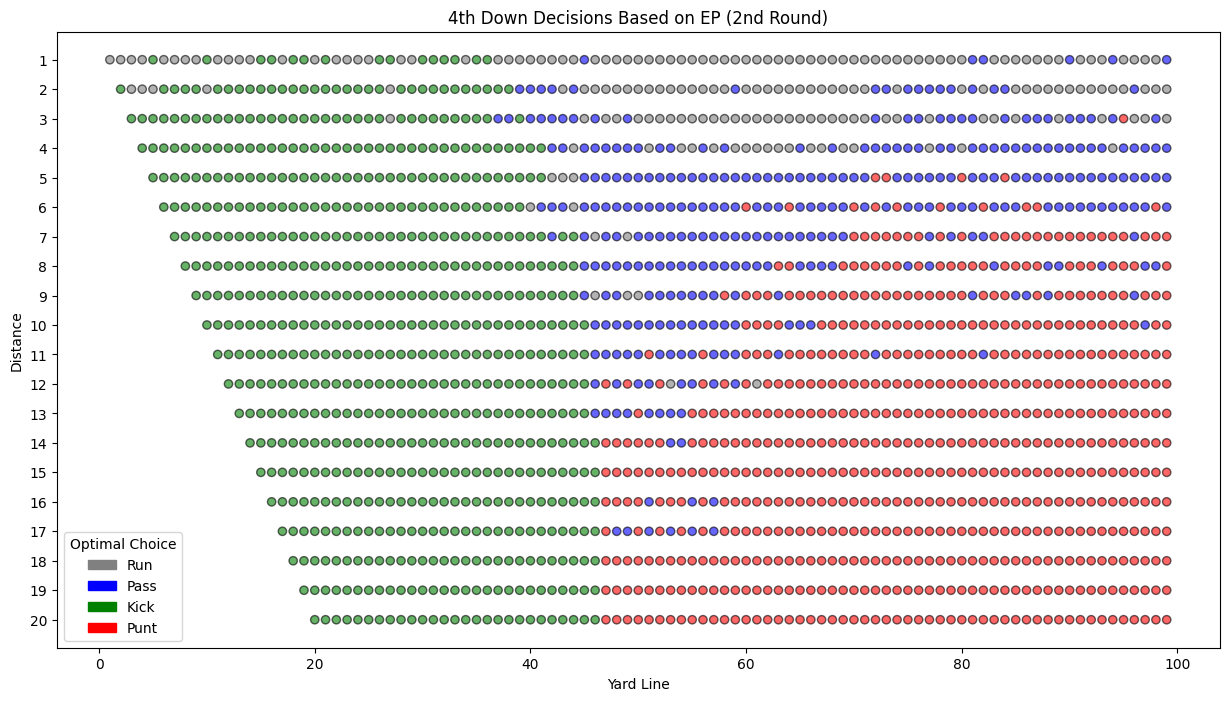

In [19]:
dfo = pd.read_csv("second_round_epas/opt_choices.csv")
dfo = dfo[dfo['Down']==4]

colors = {0: 'gray', 1: 'blue', 2: 'green', 3: 'red'}
plt.figure(figsize=(15, 8))
plt.scatter(dfo['Yardline'], dfo['Distance'], c=dfo['Optimal Choice'].map(colors), edgecolors='black', alpha=0.6)
plt.yticks(range(1, 21))
plt.title('4th Down Decisions Based on EP (2nd Round)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')
plt.gca().invert_yaxis()

labels = {0: 'Run', 1: 'Pass', 2: 'Kick', 3: 'Punt'}  # Use dictionary instead of list
legend_patches = [mpatches.Patch(color=color, label=labels[choice]) for choice, color in colors.items()]
plt.legend(handles=legend_patches, title="Optimal Choice")


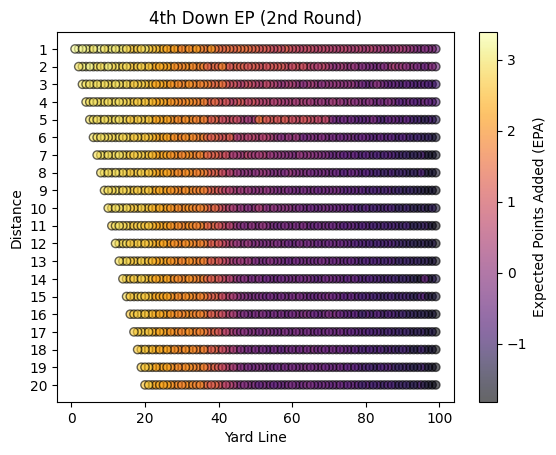

In [20]:
dfo = pd.read_csv("second_round_epas/max_epas.csv")
dfo = dfo[dfo['Down']==4]
dfo = dfo[(dfo['Down']==4) & ~(dfo['Distance'] > dfo['Yardline']) & (dfo['Distance'] <= 20)]

sc = plt.scatter(
    dfo['Yardline'], dfo['Distance'], c=dfo['EPA'], cmap='inferno', edgecolors='black', alpha=0.6
)

cbar = plt.colorbar(sc)
cbar.set_label("Expected Points Added (EPA)")
plt.yticks(range(1, 21))
plt.gca().invert_yaxis()

# Titles and labels
plt.title('4th Down EP (2nd Round)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')

plt.show()

### 3rd Round

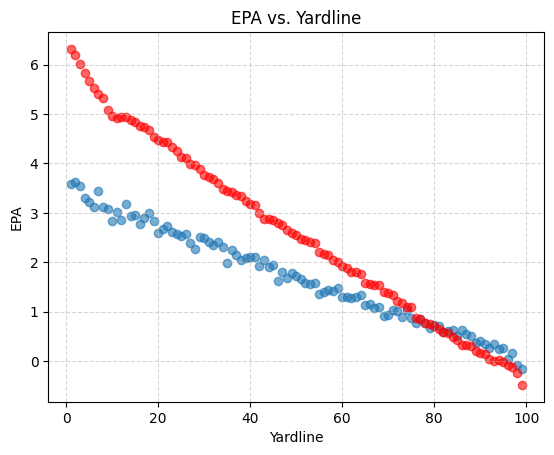

In [21]:
df_sim = pd.read_csv("third_round_epas/max_epas.csv")
df_real = pd.read_csv("nfl_pbp_data.csv")

df_sim = df_sim[df_sim['Down'] == 1]
df_sim = df_sim[((df_sim['Distance'] == 10) & (df_sim['Yardline'] >= 10)) | ((df_sim['Yardline'] <= 9) & (df_sim['Distance'] == df_sim['Yardline']))]

df_real = df_real[df_real['Down'] == 1]
df_real = df_real[((df_real['Distance'] == 10) & (df_real['Yardline'] >= 10)) | ((df_real['Yardline'] <= 9) & (df_real['Distance'] == df_real['Yardline']))]

plt.scatter(df_sim['Yardline'], df_sim['EPA'], alpha=0.6)
plt.scatter(df_real['Yardline'], df_real['EPA'], alpha=0.6, color='r')

plt.xlabel("Yardline")
plt.ylabel("EPA")
plt.title("EPA vs. Yardline")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

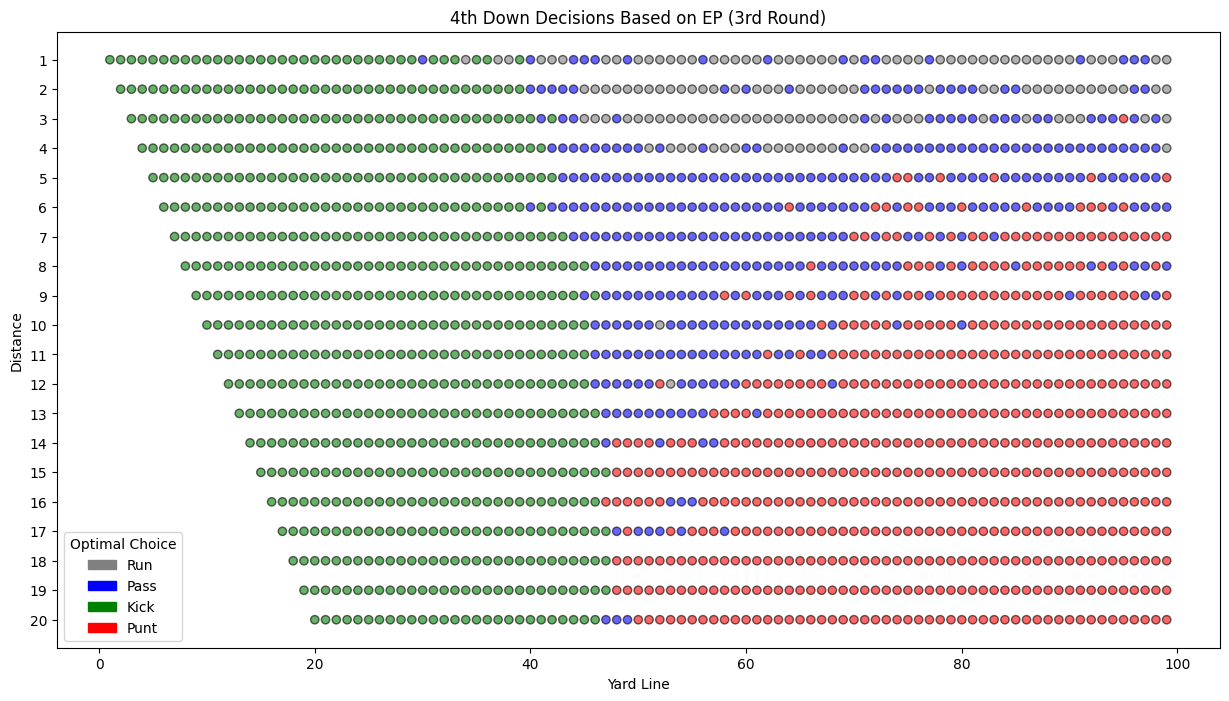

In [22]:
dfo = pd.read_csv("third_round_epas/opt_choices.csv")
dfo = dfo[dfo['Down']==4]

colors = {0: 'gray', 1: 'blue', 2: 'green', 3: 'red'}
plt.figure(figsize=(15, 8))
plt.scatter(dfo['Yardline'], dfo['Distance'], c=dfo['Optimal Choice'].map(colors), edgecolors='black', alpha=0.6)
plt.yticks(range(1, 21))
plt.title('4th Down Decisions Based on EP (3rd Round)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')
plt.gca().invert_yaxis()

labels = {0: 'Run', 1: 'Pass', 2: 'Kick', 3: 'Punt'}  # Use dictionary instead of list
legend_patches = [mpatches.Patch(color=color, label=labels[choice]) for choice, color in colors.items()]
plt.legend(handles=legend_patches, title="Optimal Choice")

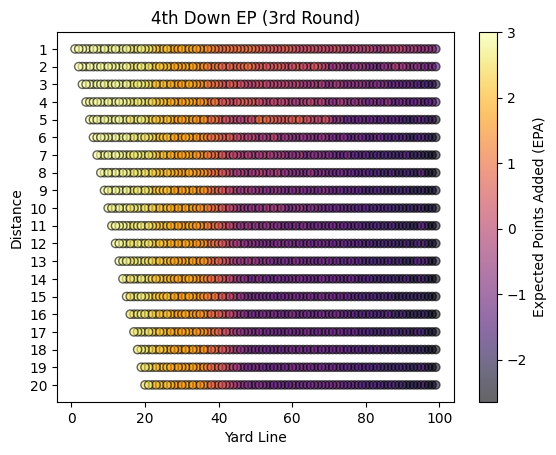

In [23]:
dfo = pd.read_csv("third_round_epas/max_epas.csv")
dfo = dfo[dfo['Down']==4]
dfo = dfo[(dfo['Down']==4) & ~(dfo['Distance'] > dfo['Yardline']) & (dfo['Distance'] <= 20)]

sc = plt.scatter(
    dfo['Yardline'], dfo['Distance'], c=dfo['EPA'], cmap='inferno', edgecolors='black', alpha=0.6
)

cbar = plt.colorbar(sc)
cbar.set_label("Expected Points Added (EPA)")
plt.yticks(range(1, 21))
plt.gca().invert_yaxis()

# Titles and labels
plt.title('4th Down EP (3rd Round)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')

plt.show()

### NFL DATA

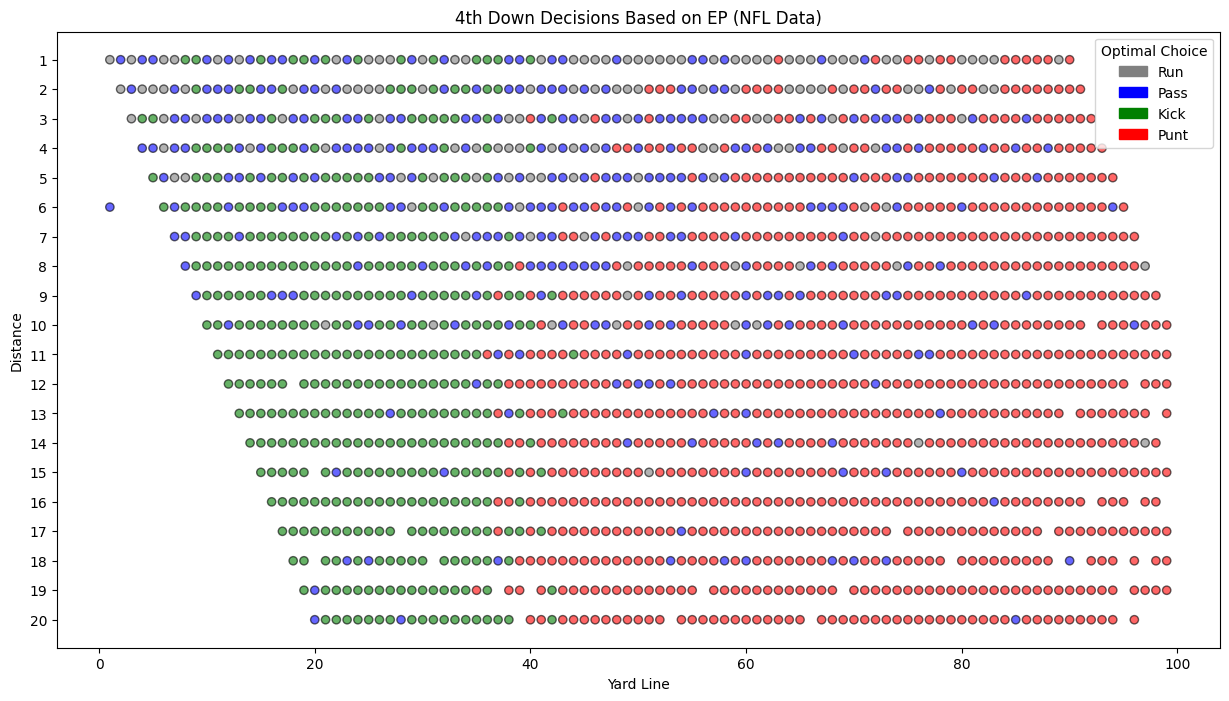

In [24]:
dfr = pd.read_csv("optimal_play_types.csv")
dfr = dfr[dfr['down']==4]

colors = {0: 'gray', 1: 'blue', 2: 'green', 3: 'red'}
plt.figure(figsize=(15, 8))
plt.scatter(dfr['yardline_100'], dfr['ydstogo'], c=dfr['play_type_num'].map(colors), edgecolors='black', alpha=0.6)
plt.yticks(range(1, 21))
plt.title('4th Down Decisions Based on EP (NFL Data)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')
plt.gca().invert_yaxis()

labels = {0: 'Run', 1: 'Pass', 2: 'Kick', 3: 'Punt'}  # Use dictionary instead of list
legend_patches = [mpatches.Patch(color=color, label=labels[choice]) for choice, color in colors.items()]
plt.legend(handles=legend_patches, title="Optimal Choice")


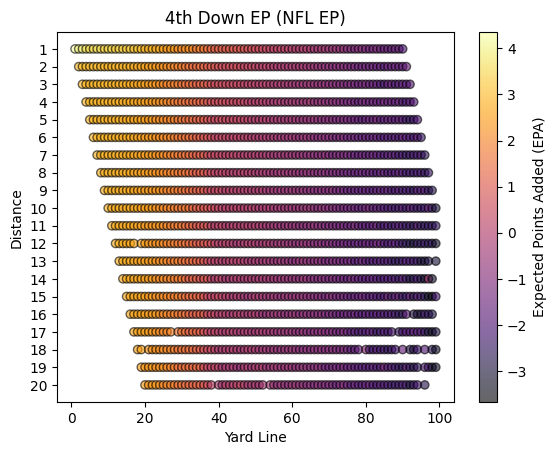

In [25]:
dfo = pd.read_csv("nfl_pbp_data.csv")
dfo = dfo[dfo['Down']==4]
dfo = dfo[(dfo['Down']==4) & ~(dfo['Distance'] > dfo['Yardline']) & (dfo['Distance'] <= 20)]

sc = plt.scatter(
    dfo['Yardline'], dfo['Distance'], c=dfo['EPA'], cmap='inferno', edgecolors='black', alpha=0.6
)

cbar = plt.colorbar(sc)
cbar.set_label("Expected Points Added (EPA)")
plt.yticks(range(1, 21))
plt.gca().invert_yaxis()

# Titles and labels
plt.title('4th Down EP (NFL EP)')
plt.xlabel('Yard Line')
plt.ylabel('Distance')

plt.show()